In [59]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz

# 데이터 분할 함수
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz
# graphviz import: 의사결정 나무 모델 시각화. .dot 확장자 파일 불러오는 패키지
import graphviz
import warnings
warnings.filterwarnings('ignore')


#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#폰트 설치

# "맑은 고딕"을 한글 폰트로 지정
import matplotlib
font_location = "C:/Users/Haejun/Downloads/darae.ttf"
# 폰트이름 가져오기 
font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
# 지정한 폰트를 기본 폰트로 지정
matplotlib.rc("font", family = font_name)

## EDA|

In [2]:
ori_data = pd.read_csv("C:/Users/Haejun/Downloads/SCALE불량.csv", engine = "python",
                         encoding="euc_kr")
ori_data.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


In [3]:
ori_data.info()
#ori_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
PLATE_NO             720 non-null object
ROLLING_DATE         720 non-null object
SCALE                720 non-null object
SPEC                 720 non-null object
STEEL_KIND           720 non-null object
PT_THK               720 non-null float64
PT_WDTH              720 non-null int64
PT_LTH               720 non-null int64
PT_WGT               720 non-null int64
FUR_NO               720 non-null object
FUR_NO_ROW           720 non-null int64
FUR_HZ_TEMP          720 non-null int64
FUR_HZ_TIME          720 non-null int64
FUR_SZ_TEMP          720 non-null int64
FUR_SZ_TIME          720 non-null int64
FUR_TIME             720 non-null int64
FUR_EXTEMP           720 non-null int64
ROLLING_TEMP_T5      720 non-null int64
HSB                  720 non-null object
ROLLING_DESCALING    720 non-null int64
WORK_GR              720 non-null object
dtypes: float64(1), int64(12), object(8)
memo

#### 총 20가지의 설명 변수와 목표변수가(scale) 이 존재하며, 결측치는 존재하지 않는다. 설명변수중 PLATE_NO 가 있는데 고유식별자라고 판단되 빼고 분석하겠다. 나머지 object로된 변수들(SCALE, WORK_GR, HSB, FUR_NO, STEEL_KIND, SPEC)도 살펴보겠다. Rolling Data의 경우 시계열 분석은 하지 않을것임으로 제거 하겠다.

## Target Variable(SCALE)

In [4]:
s_d = ori_data.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace=False)

In [5]:
# s_d['SCALE'][s_d["SCALE"]=='양품'] = 0
# s_d['SCALE'][s_d["SCALE"]=='불량'] = 1

#### 양품일 경우 0, 불량일 경우 1로 바꿔주었다.

양품    489
불량    231
Name: SCALE, dtype: int64


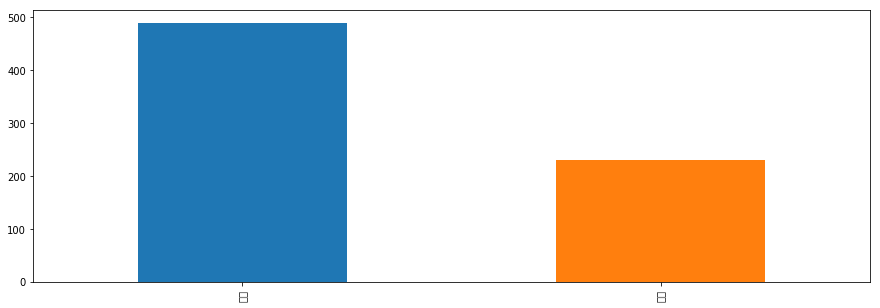

In [6]:
### figuresize change
plt.rcParams["figure.figsize"] = [15,5]
scale_count = s_d['SCALE'].value_counts()
print(scale_count)
scale_count.plot.bar()

#### 양품의 비중이 불량에 비해 약2배 정도되는 사실을 확인하였다. 다른object설명변수들의 분포도를 확인해 보겠다.

## Discrete Variables 

In [7]:
e_d = s_d[["SPEC","STEEL_KIND","FUR_NO","HSB","WORK_GR"]]
e_d.head()

,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,AB/EH32-TM,T1,1호기,적용,2조
1,AB/EH32-TM,T1,1호기,적용,2조
2,NV-E36-TM,T8,2호기,적용,3조
3,NV-E36-TM,T8,2호기,적용,3조
4,BV-EH36-TM,T8,3호기,적용,1조


### SPEC(제품규격)

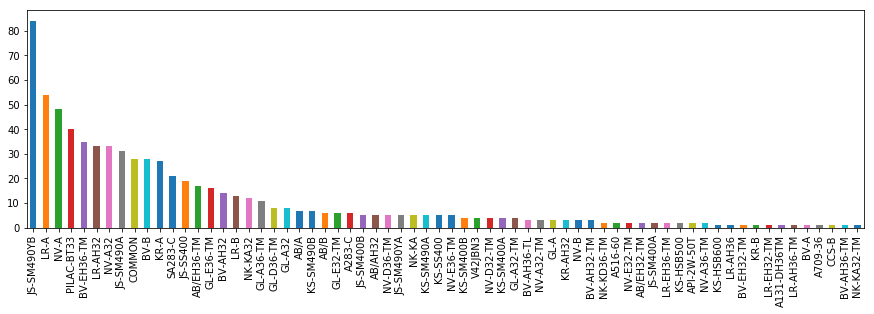

In [8]:
### figuresize change
plt.rcParams["figure.figsize"] = [15,4]
spec = e_d["SPEC"].value_counts()
spec_list = set(e_d["SPEC"])
spec.plot.bar()

#### JS-SM490YB라는 제품 규격이 가장 많은 빈도수를 가지고 있다.

In [9]:
for x in spec_list:
    print("{}규격 -양품률\n".format(x), ori_data[(ori_data.SPEC == "{}".format(x))].SCALE.value_counts())

NV-E32-TM규격 -양품률
 양품    2
Name: SCALE, dtype: int64
BV-AH36-TL규격 -양품률
 양품    2
불량    1
Name: SCALE, dtype: int64
JS-SM400A규격 -양품률
 불량    2
Name: SCALE, dtype: int64
JS-SM490YB규격 -양품률
 양품    49
불량    35
Name: SCALE, dtype: int64
JS-SM490A규격 -양품률
 불량    25
양품    6 
Name: SCALE, dtype: int64
LR-AH36-TM규격 -양품률
 양품    1
Name: SCALE, dtype: int64
JS-SS400규격 -양품률
 불량    17
양품    2 
Name: SCALE, dtype: int64
BV-A규격 -양품률
 양품    1
Name: SCALE, dtype: int64
LR-B규격 -양품률
 양품    7
불량    6
Name: SCALE, dtype: int64
BV-AH32-TM규격 -양품률
 양품    3
Name: SCALE, dtype: int64
AB/A규격 -양품률
 불량    4
양품    3
Name: SCALE, dtype: int64
NK-KD36-TM규격 -양품률
 양품    2
Name: SCALE, dtype: int64
JS-SM490YA규격 -양품률
 불량    4
양품    1
Name: SCALE, dtype: int64
KS-HSB600규격 -양품률
 양품    1
Name: SCALE, dtype: int64
NK-KA규격 -양품률
 양품    3
불량    2
Name: SCALE, dtype: int64
GL-A36-TM규격 -양품률
 양품    11
Name: SCALE, dtype: int64
AB/AH32규격 -양품률
 양품    4
불량    1
Name: SCALE, dtype: int64
JS-SM400B규격 -양품률
 불량    3
양품    2
Name: SCALE, dtype:

In [10]:
# API-2W-50T BV-AH32-TM  JS-SS400 KR-AH32 SPEC_V42JBN3
2/19

0.10526315789473684

#### 다양한 규격이 있는데 조금더 빠르고 간단한 모델링을 위해 변수를 3가지로 나누겠다. 불량률 40%이상의 규격들은 비슷한 규격이거나 특이 규격이라고 판단되어 변수이름을 High으로 바꿔주겠다. 특히 가장 많이 생산된 JS-SM490YB규격은  불량률이 42%에 육박하는데, JS-SM490YB규격의 다른 설명변수들도 비교해 봐야 할거 같다.  불량률 10%이상 40%미만의 규격에대해선 Med, 불량률10% 미만의 제품들도 변수이름을 Low으로 바꾸겠다. 

In [11]:
s_d["SPEC"][s_d["SPEC"] == "API-2W-50T"] = 'Low'  #0% (2)
s_d["SPEC"][s_d["SPEC"] == "BV-AH32-TM"] = 'Low'   #0%(3)
s_d["SPEC"][s_d["SPEC"] == "JS-SS400"] = 'Med'      # 10.5%
s_d["SPEC"][s_d["SPEC"] == "KR-AH32"] = 'Low'      # 0%(3)
s_d["SPEC"][s_d["SPEC"] == "V42JBN3"] = 'Med'      # 25%

s_d["SPEC"][s_d["SPEC"] == "LR-AH32"] = 'Med'
s_d["SPEC"][s_d["SPEC"] == "BV-AH32"] = 'Med'
s_d["SPEC"][s_d["SPEC"] == "NV-A32-TM"] = 'Med'
s_d["SPEC"][s_d["SPEC"] == "LR-A"] = 'Med'
s_d["SPEC"][s_d["SPEC"] == "JS-SM490YB"] = 'High'
s_d["SPEC"][s_d["SPEC"] == "NK-KA32-TM"] = 'Low'
s_d["SPEC"][s_d["SPEC"] == "GL-A"] = 'Med'
s_d["SPEC"][s_d["SPEC"] == "GL-E36-TM"] = 'Med'
s_d["SPEC"][s_d["SPEC"] == "KS-HSB500"] = 'Low'
s_d["SPEC"][s_d["SPEC"] == "LR-EH32-TM"] = 'High'
s_d["SPEC"][s_d["SPEC"] == "BV-EH32-TM"] = 'Low'
s_d["SPEC"][s_d["SPEC"] == "KS-SM490A"] = 'High'
s_d["SPEC"][s_d["SPEC"] == "AB/EH36-TM"] = 'Low'
s_d["SPEC"][s_d["SPEC"] == "A709-36"] = 'Low'
s_d["SPEC"][s_d["SPEC"] == "AB/A"] = 'High'
s_d["SPEC"][s_d["SPEC"] == "NK-KD36-TM"] = 'Low'


s_d["SPEC"][s_d["SPEC"] == "JS-SS4002"] = 'High'     ### 90%
s_d["SPEC"][s_d["SPEC"] == "GL-A32-TM"] = 'Med'     ### 25%
s_d["SPEC"][s_d["SPEC"] == "BV-EH36-TM"] = 'Low'    ### 0.03%
s_d["SPEC"][s_d["SPEC"] == "BV-AH36-TL"] = 'Med'    ### 33%
s_d["SPEC"][s_d["SPEC"] == "BV-B"] = 'High'          ####21.4%
s_d["SPEC"][s_d["SPEC"] == "SA283-C"] = 'High'       # 47.6%
s_d["SPEC"][s_d["SPEC"] == "NV-A"] = 'Med'          #29.2%
s_d["SPEC"][s_d["SPEC"] == "NV-B"] = 'High'          #33%
s_d["SPEC"][s_d["SPEC"] == "A516-60"] = 'High'       #50%
s_d["SPEC"][s_d["SPEC"] == "NV-D32-TM"] = 'Low'     #0%(4)
s_d["SPEC"][s_d["SPEC"] == "PILAC-BT33"] = 'Low'    #.05%
s_d["SPEC"][s_d["SPEC"] == "LR-B"] = 'High'          #46.2%
s_d["SPEC"][s_d["SPEC"] == "NK-KA"] = 'High'         #40%
s_d["SPEC"][s_d["SPEC"] == "AB/EH32-TM"] = 'Low'    #0(2)
s_d["SPEC"][s_d["SPEC"] == "A283-C"] = 'Med'        #17%
s_d["SPEC"][s_d["SPEC"] == "NV-E32-TM"] = 'Low'     #0%(2)


s_d["SPEC"][s_d["SPEC"] == "AB/B"] = 'High'          ### 50%
s_d["SPEC"][s_d["SPEC"] == "KS-SM400B"] = 'High'     ### 50%
s_d["SPEC"][s_d["SPEC"] == "NV-D36-TM"] = 'Med'     ### 20%
s_d["SPEC"][s_d["SPEC"] == "JS-SM400A"] = 'High'     ### 60%
s_d["SPEC"][s_d["SPEC"] == "LR-AH36-TM"] = 'Low'    #### 0%(1)
s_d["SPEC"][s_d["SPEC"] == "JS-SM490A"] = 'High'     # 19.4%
s_d["SPEC"][s_d["SPEC"] == "NK-KA32"] = 'Low'       # 0.083%
s_d["SPEC"][s_d["SPEC"] == "KR-B"] = 'High'          # 100%(1)
s_d["SPEC"][s_d["SPEC"] == "KS-SM400A"] = 'High'     # 75%
s_d["SPEC"][s_d["SPEC"] == "KS-SM490B"] = 'Low'     # 42.9%
s_d["SPEC"][s_d["SPEC"] == "COMMON"] = 'Low'        # 0.0714%
s_d["SPEC"][s_d["SPEC"] == "LR-AH36"] = 'Low'       # 0%(1)
s_d["SPEC"][s_d["SPEC"] == "BV-AH36-TM"] = 'High'    # 100%(1)
s_d["SPEC"][s_d["SPEC"] == "BV-A"] = 'Low'          # 0(1)
s_d["SPEC"][s_d["SPEC"] == "CCS-B"] = 'High'         # 100%(1)
s_d["SPEC"][s_d["SPEC"] == "NV-A36-TM"] = 'Low'     #0%(2)


s_d["SPEC"][s_d["SPEC"] == "JS-SM490YA"] = 'High'    ### 80%
s_d["SPEC"][s_d["SPEC"] == "JS-SM400B"] = 'High'     ### 60%
s_d["SPEC"][s_d["SPEC"] == "NV-E36-TM"] = 'Low'     ### 0%(5)
s_d["SPEC"][s_d["SPEC"] == "GL-E32-TM"] = 'Med'     ### 0.17%
s_d["SPEC"][s_d["SPEC"] == "KS-HSB600"] = 'Low'     #### 0%(1)
s_d["SPEC"][s_d["SPEC"] == "KS-SS400"] = 'High'      # 60%
s_d["SPEC"][s_d["SPEC"] == "LR-EH36-TM"] = 'Low'    # 0%(2)
s_d["SPEC"][s_d["SPEC"] == "KR-B"] = 'High'          # 100%(1)
s_d["SPEC"][s_d["SPEC"] == "NV-A32"] = 'Med'        # 27.3%
s_d["SPEC"][s_d["SPEC"] == "GL-D36-TM"] = 'Med'     # 25%
s_d["SPEC"][s_d["SPEC"] == "GL-A32"] = 'Med'        # 17.5%
s_d["SPEC"][s_d["SPEC"] == "GL-A36-TM"] = 'Low' # 0%(11) - 생산높음
s_d["SPEC"][s_d["SPEC"] == "KR-A"] = 'Med'          # 37%(1)
s_d["SPEC"][s_d["SPEC"] == "A131-DH36TM"] = 'High'   # 100(1)
s_d["SPEC"][s_d["SPEC"] == "AB/AH32"] = 'Med'       # 20%

### STEEL_KIND(강종)

C0    503
T8    95 
T5    43 
T7    35 
T1    18 
T0    16 
C3    7  
T3    2  
C1    1  
Name: STEEL_KIND, dtype: int64


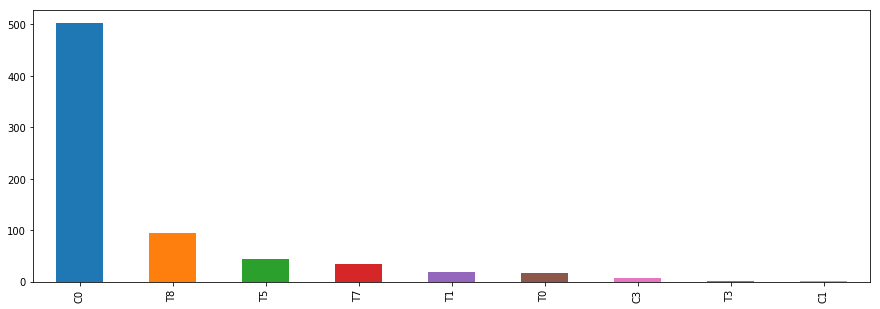

In [12]:
### figuresize change
plt.rcParams["figure.figsize"] = [15,5]
steel = e_d["STEEL_KIND"].value_counts()
print(steel)
steel.plot.bar()

#### C0강종이 가장 많은 빈도수를 가지고 있으며 T8, T5순이다.

In [13]:
print("C0-양품률\n", ori_data[(ori_data.STEEL_KIND == "C0")].SCALE.value_counts())
print("T8-양품률\n",ori_data[(ori_data.STEEL_KIND == "T8")].SCALE.value_counts())
print("T5-양품률\n",ori_data[(ori_data.STEEL_KIND == "T5")].SCALE.value_counts())
print("T7-양품률\n", ori_data[(ori_data.STEEL_KIND == "T7")].SCALE.value_counts())
print("T1-양품률\n", ori_data[(ori_data.STEEL_KIND == "T1")].SCALE.value_counts())
print("T0-양품률\n",ori_data[(ori_data.STEEL_KIND == "T0")].SCALE.value_counts())
print("C3-양품률\n",ori_data[(ori_data.STEEL_KIND == "C3")].SCALE.value_counts())
print("T3-양품률\n", ori_data[(ori_data.STEEL_KIND == "T3")].SCALE.value_counts())
print("C1-양품률\n",ori_data[(ori_data.STEEL_KIND == "C1")].SCALE.value_counts())

C0-양품률
 양품    291
불량    212
Name: SCALE, dtype: int64
T8-양품률
 양품    90
불량    5 
Name: SCALE, dtype: int64
T5-양품률
 양품    41
불량    2 
Name: SCALE, dtype: int64
T7-양품률
 양품    29
불량    6 
Name: SCALE, dtype: int64
T1-양품률
 양품    16
불량    2 
Name: SCALE, dtype: int64
T0-양품률
 양품    14
불량    2 
Name: SCALE, dtype: int64
C3-양품률
 양품    6
불량    1
Name: SCALE, dtype: int64
T3-양품률
 양품    2
Name: SCALE, dtype: int64
C1-양품률
 불량    1
Name: SCALE, dtype: int64


#### 강종에 따라 양품률이 차이가 심하게 나는데, C0강종의경우 반정도(40%)정도가 불량이였으며, C1의 경우 전부다 불량이였다. 물론 C1 강종으로 만들어진 샘플이 1밖에 존재하지 않아 정확히 판단은 어렵지만 강종이 양품률에 영향력이 있는것으로 판단된다. 강종또한 3가지 category로 만들겠다. 불량률 10%미만 Low, 10~40%미만은 Med, 40%이상은 High로 만들겠다.

In [14]:
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "C0"] = "High" # 42.1%
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "T8"] = "Low"  # 5.3%
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "T5"] = "Low" # 4.6%

s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "T7"] = "Med" # 17.1%
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "T1"] = "Med" # 11.1%

s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "T0"] = "Med" # 12.5%
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "C3"] = "Med" # 16.7%
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "T3"] = "Low" # 0% (3)
s_d["STEEL_KIND"][s_d["STEEL_KIND"] == "C1"] = "High" # 100% (1)


### FUR_NO(가열로 호기)

3호기    243
1호기    240
2호기    237
Name: FUR_NO, dtype: int64


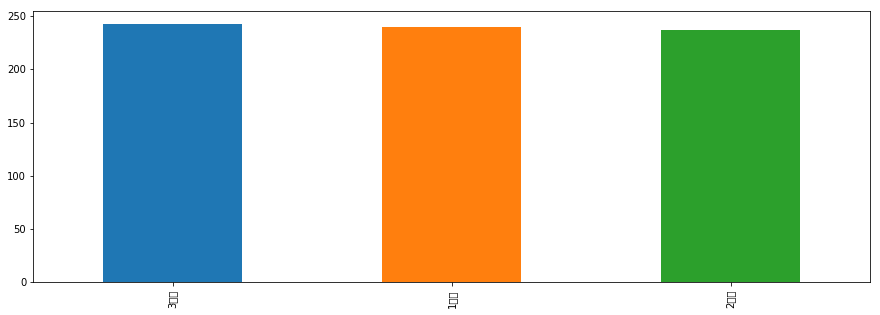

In [15]:
### figuresize change
plt.rcParams["figure.figsize"] = [15,5]
fur = e_d["FUR_NO"].value_counts()
print(fur)
fur.plot.bar()

#### 가열로 호기는 1호부터 3호기 까지 분포가 거의 비슷하다. 2호기가 237개로 가장 적지만 차이가 크지않다.

In [16]:
print("1호기-양품률\n", ori_data[(ori_data.FUR_NO == "1호기")].SCALE.value_counts())
print("2호기-양품률\n",ori_data[(ori_data.FUR_NO == "2호기")].SCALE.value_counts())
print("3호기-양품률\n",ori_data[(ori_data.FUR_NO == "3호기")].SCALE.value_counts())

1호기-양품률
 양품    167
불량    73 
Name: SCALE, dtype: int64
2호기-양품률
 양품    167
불량    70 
Name: SCALE, dtype: int64
3호기-양품률
 양품    155
불량    88 
Name: SCALE, dtype: int64


#### 1~3호기 모두 2.3정도의 양품-불량 비율을 가지고 있으며, 3호기만 불량비율이 조금 높지만, 설명력이 크게 있을것이라고 판단되지 않는다. 설명변수에서 제거 하겠다. (3호기는 불량률이 조금 높은데, 기계노후등이 이유가 될것이라고 판단된다.)

### HSB(HSB적용 여부)

적용     687
미적용    33 
Name: HSB, dtype: int64


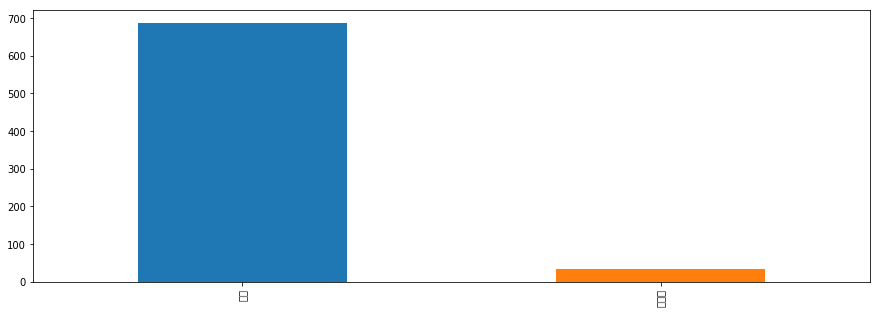

In [17]:
### figuresize change
plt.rcParams["figure.figsize"] = [15,5]
hsb = e_d["HSB"].value_counts()
print(hsb)
hsb.plot.bar()

#### 적용된게 687개로 압도적이다.

In [18]:
print("HSB적용-양품률\n", ori_data[(ori_data.HSB == "적용")].SCALE.value_counts())
print("HSB미적용-양품률\n",ori_data[(ori_data.HSB == "미적용")].SCALE.value_counts())

HSB적용-양품률
 양품    489
불량    198
Name: SCALE, dtype: int64
HSB미적용-양품률
 불량    33
Name: SCALE, dtype: int64


#### HSB미적용시 전부 불량이 나온것으로 보여진다. 미적용은 양품률에 미치는 영향이 클것으로 판단된다. binary형태로 이름을 바꿔 조금더 모델에 쉽게 적용되게 하겠다.

In [19]:
s_d["HSB"][(s_d.HSB == "적용")] = 1
s_d["HSB"][(s_d.HSB == "미적용")] = 0

### WORK_GR(작업조)

4조    194
1조    189
3조    172
2조    165
Name: WORK_GR, dtype: int64


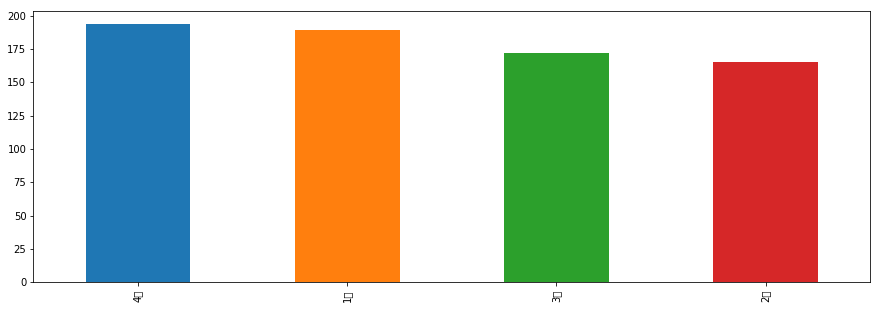

In [20]:
### figuresize change
plt.rcParams["figure.figsize"] = [15,5]
w = e_d["WORK_GR"].value_counts()
print(w)
w.plot.bar()

#### 4조가 가장 작업이 많았고 2조가 가장 적었다.

In [21]:
print("1조-양품률\n", ori_data[(ori_data.WORK_GR == "1조")].SCALE.value_counts())
print("2조-양품률\n",ori_data[(ori_data.WORK_GR == "2조")].SCALE.value_counts())
print("3조-양품률\n",ori_data[(ori_data.WORK_GR == "3조")].SCALE.value_counts())
print("4조-양품률\n",ori_data[(ori_data.WORK_GR == "4조")].SCALE.value_counts())

1조-양품률
 양품    122
불량    67 
Name: SCALE, dtype: int64
2조-양품률
 양품    120
불량    45 
Name: SCALE, dtype: int64
3조-양품률
 양품    118
불량    54 
Name: SCALE, dtype: int64
4조-양품률
 양품    129
불량    65 
Name: SCALE, dtype: int64


#### 작업조에 따라서 양품과불량의 비율이 균일하게 보인다. 대부분 작업조에서 양품이 불량의 2배 정도 되며, 2조만 2.6배정도 된다. WORK_GR은 설명력이 크지 않을 것으로 판단된다. 설명변수에서 제거 하겠다. (2조만 불량률이 높은데 총 생산량(165)도 조금 낮으며 숙련이 덜된 직원들이라고 추측해볼수 있을것같다.)

## Continuous Variables

In [22]:
c_d = s_d.drop(["SPEC","STEEL_KIND","FUR_NO","HSB","WORK_GR","SCALE"],axis=1,inplace=False)
c_d.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,1133,934,8
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,1135,937,8
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,1121,889,8
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,1127,885,8
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,1128,873,8


In [23]:
#c_d[["PT_WGT","PT_LTH","PT_WDTH"]].boxplot()

#### 대부부분 쌍봉을 이룬 형태이며, FUR_NO_ROW(가열로 작업 순번)의 경우 1.2로된 연속형 형태이다. 또한 ROLING_DESCALING 6가지범주가 나뉜 샘플로 판단된다. 먼저 이2가지 변수와 SCALE에 영향력이 있는지 살펴 보겠다.

### FUR_NO_ROW(작업조 순서)

In [24]:
print("작업순서1 - 양품률\n", ori_data[ori_data["FUR_NO_ROW"]==1].SCALE.value_counts())
print("작업순서2 - 양품률\n",ori_data[ori_data["FUR_NO_ROW"]==2].SCALE.value_counts())

작업순서1 - 양품률
 양품    242
불량    120
Name: SCALE, dtype: int64
작업순서2 - 양품률
 양품    247
불량    111
Name: SCALE, dtype: int64


#### 두순서 모두 양품과 불량을 비슷하게 생산하였다. 설명변수로써 영향력이 크지 않을것으로 판된된다. 모델링에선 제외하겠다.

### ROLLING_DESCALING(압연 중 Descaling횟수)

In [25]:
ori_data["ROLLING_DESCALING"].value_counts()

10    296
8     208
6     176
9     20 
7     15 
5     5  
Name: ROLLING_DESCALING, dtype: int64

In [26]:
print("5회 - 양품률\n", ori_data[ori_data["ROLLING_DESCALING"]==5].SCALE.value_counts())
print("6회 - 양품률\n",ori_data[ori_data["ROLLING_DESCALING"]==6].SCALE.value_counts())
print("7회 - 양품률\n", ori_data[ori_data["ROLLING_DESCALING"]==7].SCALE.value_counts())
print("8회 - 양품률\n",ori_data[ori_data["ROLLING_DESCALING"]==8].SCALE.value_counts())
print("9회 - 양품률\n", ori_data[ori_data["ROLLING_DESCALING"]==9].SCALE.value_counts())
print("10회 - 양품률\n",ori_data[ori_data["ROLLING_DESCALING"]==10].SCALE.value_counts())

5회 - 양품률
 불량    5
Name: SCALE, dtype: int64
6회 - 양품률
 양품    150
불량    26 
Name: SCALE, dtype: int64
7회 - 양품률
 불량    15
Name: SCALE, dtype: int64
8회 - 양품률
 양품    109
불량    99 
Name: SCALE, dtype: int64
9회 - 양품률
 불량    20
Name: SCALE, dtype: int64
10회 - 양품률
 양품    230
불량    66 
Name: SCALE, dtype: int64


#### 특정 횟수(5회, 7회, 9회)에서 불량률 100%이며 횟수가 불량률에 미치는 영향을 크다고 판단된다.

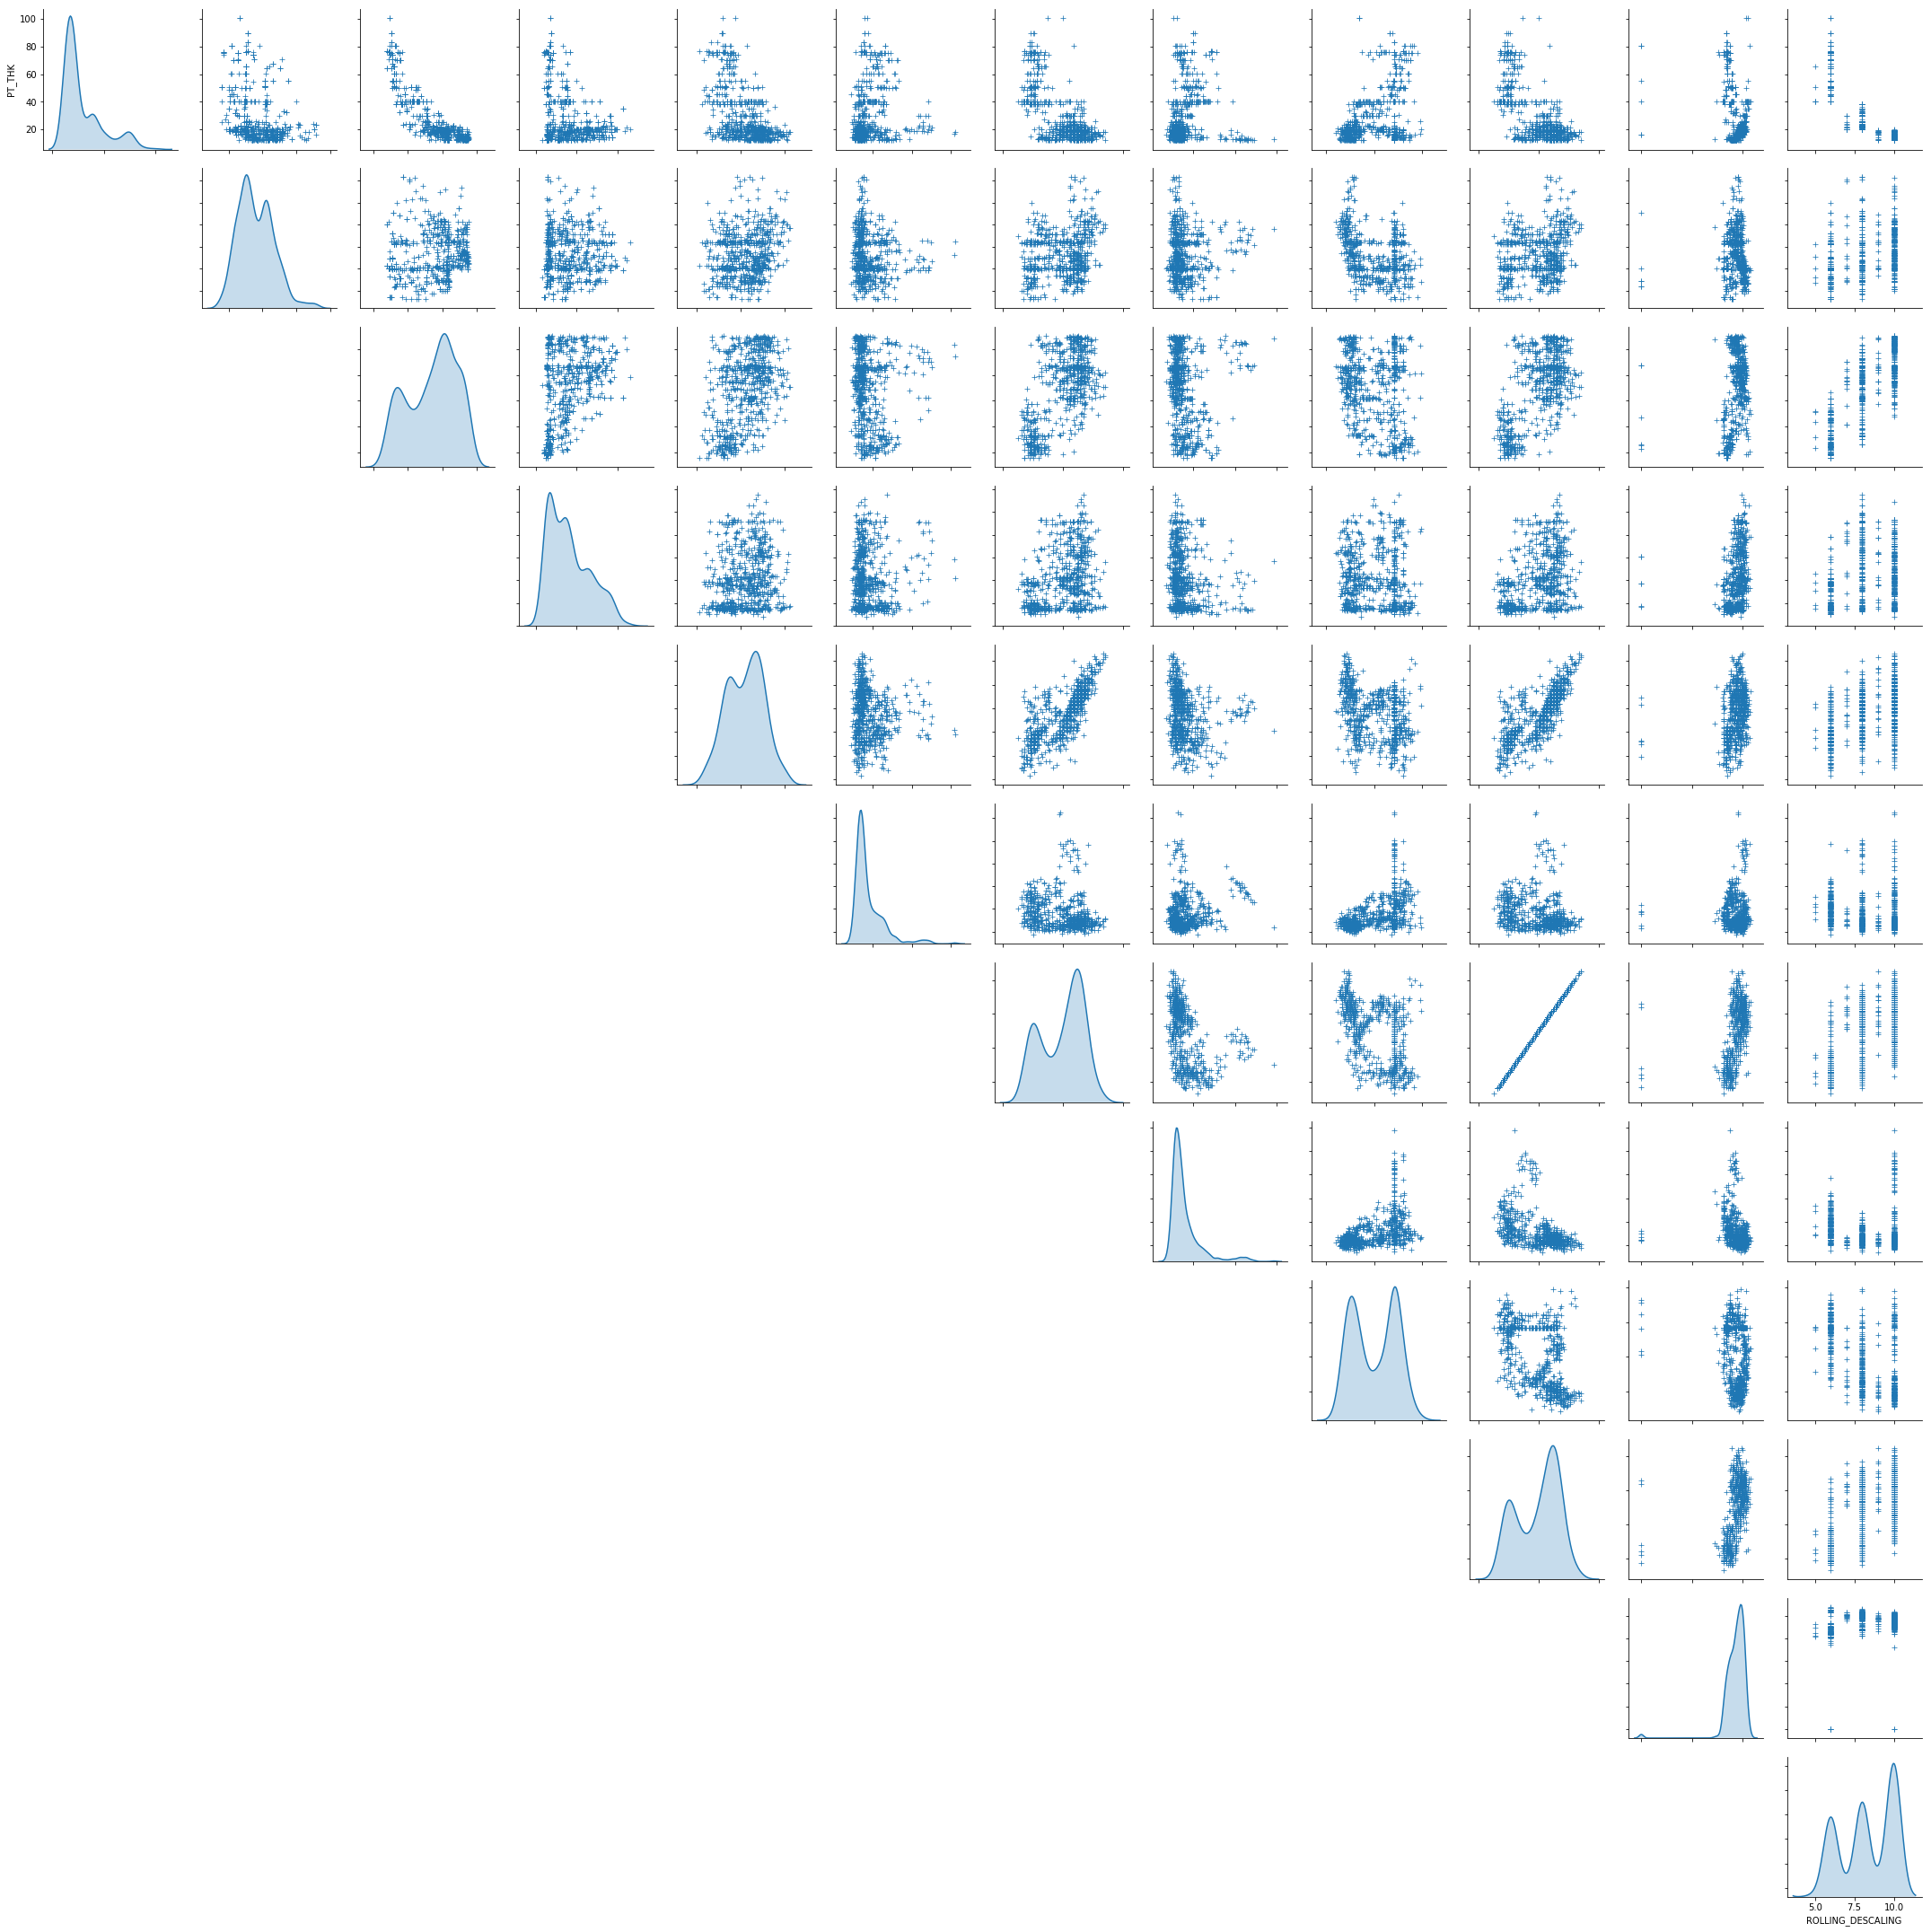

In [27]:
#### pairplot
without_row = c_d.drop("FUR_NO_ROW",axis=1,inplace=False)
g = sns.pairplot(without_row,diag_kind='kde',markers='+')
for i,j in zip(*np.triu_indices_from(g.axes,1)):
    g.axes[j,i].set_visible(False)

#### PT_THK(plate두께) 와 PT_LTH(plate길이)는 반비례 2차 곡선을 띄고 있다. 두께가 얇아짐에 따라 길이 빠르게 늘어나는 경향을 보이고 있다. 두개 변수중 상대적으로 Standard Deviation이 작은 PT_THK를 사용하는것이 좋을 것이라고 판단되지만, 단위가 두께에 비해 매우 크다. 또한 PT_LTH와 ROLLING DESCALING은 강한 양의 선형 관계가 있는 것으로 보이며 PT_LTH를 제거함으로써 더욱 신뢰있는 모델을 만들수 있을것이라고 판단된다. <br>ROLLING_TEMP_T5(가열대 온도)에서 소량의(outlier로 예상되는) 데이터때문에 쌍봉이 나왔는데 가열대온도에 대해 불량률이 어떻게 되는지 조사해 보겠다.

In [28]:
print(ori_data["ROLLING_TEMP_T5"].describe())
ori_data[ori_data["ROLLING_TEMP_T5"] <= 800].SCALE.value_counts()

count    720.000000 
mean     933.920833 
std      107.863887 
min      0.000000   
25%      889.750000 
50%      951.000000 
75%      994.250000 
max      1078.000000
Name: ROLLING_TEMP_T5, dtype: float64


양품    10
Name: SCALE, dtype: int64

In [29]:
ori_data[ori_data["ROLLING_TEMP_T5"] <= 800].ROLLING_DESCALING

41     6 
74     6 
77     6 
184    10
185    10
448    6 
494    6 
495    6 
496    6 
519    10
Name: ROLLING_DESCALING, dtype: int64

#### 800 미만으로 다 양품이 나왔는데, 정확한 가열대 온도에 대한 실무자로써 경험이 없어 이상치라고 판단하기 힘들것 같다.

In [30]:
#without_row.corr()

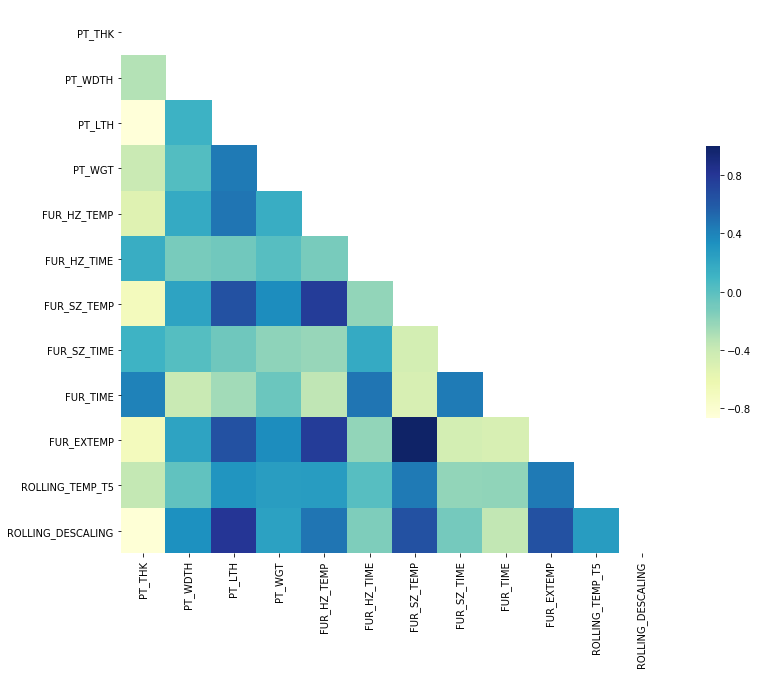

In [31]:
colNm = list(without_row.head(0))
corr = without_row[colNm[0:]].corr(method='pearson')
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,cmap='YlGnBu',vmax=1,center=0.1,square=True,linewidths=0,
           cbar_kws={"shrink":.5})

#### FUR_EXTEMP(압연온도) 와 FUR_SZ_TEMP(가열로 균일대 온도)는 완벽한 선형 관계에 있는데 둘중 한가지만 설명 변수로 사용하겠다. https://patents.google.com/patent/KR101090877B1/ko에 따르면, 압연 안에 가열로 단계 속에 균열대과정을 포함하여 균열대 과정은 제거 하고 압연변수만 사용하겠다.

In [32]:
after_eda = s_d.drop(["FUR_NO","PT_LTH","WORK_GR","FUR_SZ_TEMP","FUR_NO_ROW"],axis=1,inplace=False)
after_eda.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,양품,Low,Med,32.25,3707,14180,1144,116,59,282,1133,934,1,8
1,양품,Low,Med,32.25,3707,14180,1144,122,53,283,1135,937,1,8
2,양품,Low,Low,33.27,3619,18130,1129,116,55,282,1121,889,1,8
3,양품,Low,Low,33.27,3619,18130,1152,125,68,316,1127,885,1,8
4,양품,Low,Low,38.33,3098,12430,1140,134,48,314,1128,873,1,8


## Data Split(7:3)

In [33]:
# # get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성 
# ori_dummy = pd.get_dummies(ori_data)
# # 더미변수 생성된 데이터의 상위 5개row를 확인
# ori_dummy.head()
# d_y = ori_dummy['SCALE']
# d_x = ori_dummy.drop(['SCALE',"ROLLING_DATE"],axis=1, inplace=False)

# # # train/test 데이터의 목표변수/설명변수 지정
# train_x, test_x, train_y, test_y = \
# train_test_split(d_x, d_y, test_size=0.3, random_state=1234)

# # # train데이터와 test데이터 크기
# print("train data X size: {}".format(train_x.shape))
# print("train data Y size: {}".format(train_y.shape))
# print("test data X size: {}".format(test_x.shape))
# print("test data Y size: {}".format(test_y.shape))

## Decision Tree Modeling With All Data

### Categorical과 Continuous Variable이 predictor로 섞여 있을경우 문제가 되지 않는 Tree-based의 모델링을 먼저 진행하겠다.

In [34]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성 
ori_dummy = pd.get_dummies(ori_data.drop("SCALE",axis=1,inplace=False))
# 더미변수 생성된 데이터의 상위 5개row를 확인
print()
d_y = ori_data['SCALE']
d_x = ori_dummy

# # train/test 데이터의 목표변수/설명변수 지정
train_x, test_x, train_y, test_y = \
train_test_split(d_x, d_y, test_size=0.3, random_state=1234)

# # train데이터와 test데이터 크기
print("train data X size: {}".format(train_x.shape))
print("train data Y size: {}".format(train_y.shape))
print("test data X size: {}".format(test_x.shape))
print("test data Y size: {}".format(test_y.shape))


train data X size: (504, 1521)
train data Y size: (504,)
test data X size: (216, 1521)
test data Y size: (216,)


In [35]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(train_x,train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(train_x, train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(test_x, test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.977


## Decision Tree Modeling With Cleaned Data

In [39]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성 
ori_dummy = pd.get_dummies(after_eda.drop("SCALE",axis=1,inplace=False))
# 더미변수 생성된 데이터의 상위 5개row를 확인
#print(d_y)
d_y = after_eda['SCALE']
d_x = ori_dummy

# # train/test 데이터의 목표변수/설명변수 지정
train_x, test_x, train_y, test_y = \
train_test_split(d_x, d_y, test_size=0.3, random_state=1234)

# # train데이터와 test데이터 크기
print("train data X size: {}".format(train_x.shape))
print("train data Y size: {}".format(train_y.shape))
print("test data X size: {}".format(test_x.shape))
print("test data Y size: {}".format(test_y.shape))


train data X size: (504, 18)
train data Y size: (504,)
test data X size: (216, 18)
test data Y size: (216,)


In [40]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(train_x,train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(train_x, train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(test_x, test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.977


#### 데이터 정제후 Tree의 정확도는 정제전의 정확도와 같다. 정제된데이터를 사용하는게 더욱 효율적이며 일반적인 모델을 만들수 있다고 판단된다. (세밀한 데이터설명이 필요하다면 모든변수를 사용하는게 좋을거 같다고 판단된다.)  <br> 또한 정확도가 상당히 높기에 시간관계상 Parameter tuning은 진행하지 않겠다.

## Random Forest Modeling with Cleaned Data

In [43]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(train_x, train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf.score(train_x, train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf.score(test_x, test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.958


#### 정확도가 Decision Tree에 비해 2%정도 낮아 졌다. 데이터 가공전 모든 데이터로 다시 RandomForest모델링을 해보겠다.

## Random Forest Modeling With All Data

In [47]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성 
ori_dummy = pd.get_dummies(ori_data.drop("SCALE",axis=1,inplace=False))
# 더미변수 생성된 데이터의 상위 5개row를 확인
print()
d_y = ori_data['SCALE']
d_x = ori_dummy

# # train/test 데이터의 목표변수/설명변수 지정
train_x, test_x, train_y, test_y = \
train_test_split(d_x, d_y, test_size=0.3, random_state=1234)

# # train데이터와 test데이터 크기
# print("train data X size: {}".format(train_x.shape))
# print("train data Y size: {}".format(train_y.shape))
# print("test data X size: {}".format(test_x.shape))
# print("test data Y size: {}".format(test_y.shape))

rf = RandomForestClassifier(random_state=1234)
rf.fit(train_x, train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf.score(train_x, train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf.score(test_x, test_y)))


Accucary on training set: 1.000
Accucary on test set: 0.903


#### 모든 데이터 사용시 더욱더 정확도가 낮아 졌다.

## PCA Modeling With Cleaned Data

In [54]:
d_x = pd.get_dummies(after_eda.drop("SCALE",axis=1,inplace=False))
d_y = after_eda["SCALE"]
d_x.shape

(720, 18)

### PT_WGT와 같이 변수 단위의 편차가 큰 설명변수가 몇개 있기에 Scaling을 선행하겠다.

In [56]:
scaler = StandardScaler()
ds_supervisor_x_scaled = scaler.fit_transform(d_x)
#print("Scaled Data: \n {}".format(ds_supervisor_x_scaled[:18].round(3)))
#print("Shape: \n {}".format(ds_supervisor_x_scaled.shape))

In [62]:
pca = PCA(n_components=18)
x_pca=pca.fit_transform(ds_supervisor_x_scaled)
#print("PCA Data: \n {}".format(x_pca[:5]))
#print("Shape: \n {}".format(x_pca.shape))
ds_x_pca=pd.DataFrame(x_pca,columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10","Prin11","Prin12",
                                    "Prin13","Prin14","Prin15","Prin16","Prin17","Prin18"])

In [63]:
ds_pca = pd.DataFrame()
ds_pca['Prin'] = [i for i in range(1,19)]
ds_pca["EigenValues"] = pca.explained_variance_
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_
ds_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,6.094,0.338,0.338
1,2,2.095,0.116,0.454
2,3,1.887,0.105,0.559
3,4,1.584,0.088,0.647
4,5,1.274,0.071,0.718
5,6,1.122,0.062,0.780
6,7,0.849,0.047,0.827
7,8,0.748,0.041,0.868
8,9,0.679,0.038,0.906
9,10,0.506,0.028,0.934


In [65]:
#주성분 통계량을 입력용 새로운 데이터 프레임 생성
ds_feature = pd.DataFrame({"Feature":d_x.columns})
#주성분 Prin1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,
                            pd.DataFrame(pca.components_,columns=
            ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10","Prin11","Prin12",
                                    "Prin13","Prin14","Prin15","Prin16","Prin17","Prin18"])], axis =1)
ds_eigenvectors

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13,Prin14,Prin15,Prin16,Prin17,Prin18
0,PT_THK,3.532989e-01,-1.241753e-01,-1.949465e-01,-2.593467e-01,9.147631e-02,1.321472e-01,2.138573e-01,-3.628436e-01,-2.164596e-01,-3.200490e-01,-0.172230,0.311804,-0.113086,-0.371750,0.324180,0.136871,-0.012054,0.012054
1,PT_WDTH,-1.778660e-02,1.638888e-01,-2.167919e-01,7.952055e-02,-7.874343e-02,7.800989e-02,-1.099706e-01,8.862198e-03,-1.087091e-01,5.660943e-02,-0.316430,-0.049381,0.344961,-0.073366,-0.038126,0.158526,0.559683,-0.559683
2,PT_WGT,7.182915e-02,-2.246551e-01,2.946272e-01,-1.030624e-01,1.532383e-01,-3.079096e-02,2.326549e-01,-1.486024e-02,1.309352e-01,-8.685459e-02,0.464634,-0.039766,-0.406795,0.052021,-0.004171,-0.072211,0.419875,-0.419875
3,FUR_HZ_TEMP,-1.144630e-01,-1.529640e-01,8.102669e-02,-9.340696e-02,4.483385e-01,4.887334e-01,4.620447e-01,-1.232906e-01,7.121351e-02,6.099049e-02,-0.102292,-0.258899,0.327310,0.120411,-0.225320,0.110641,-0.066074,0.066074
4,FUR_HZ_TIME,-4.963445e-02,-1.837992e-01,1.840972e-01,-7.039893e-02,-3.367368e-01,1.443721e-02,-1.496403e-01,-8.587599e-02,-4.707987e-02,-1.659769e-01,0.134976,-0.106508,-0.033826,-0.153125,-0.392352,0.733734,-0.051547,0.051547
5,FUR_SZ_TIME,-1.973842e-01,5.714055e-01,7.033821e-02,-1.532541e-01,-1.311766e-01,4.812507e-01,-2.406479e-02,-1.707483e-01,-3.610322e-01,2.535797e-01,0.219780,0.079041,-0.279341,0.013354,-0.009787,-0.007311,-0.000674,0.000674
6,FUR_TIME,-1.176632e-01,1.155720e-02,-4.109608e-02,6.467524e-01,3.842819e-01,1.456819e-02,1.129279e-01,2.299082e-01,-1.221508e-01,9.578830e-02,-0.060787,0.373048,-0.273530,-0.140532,-0.065705,0.294220,-0.008430,0.008430
7,FUR_EXTEMP,5.836793e-02,4.947396e-01,4.719306e-01,-1.950387e-01,4.854552e-01,-3.788831e-01,-1.505288e-01,-5.025227e-02,-1.570878e-02,-1.705090e-01,-0.094222,-0.045186,0.129794,-0.097011,0.002436,0.141544,-0.007939,0.007939
8,ROLLING_TEMP_T5,-7.023205e-03,-2.681800e-01,3.140284e-01,7.554268e-02,-1.081819e-01,-2.120621e-01,1.947407e-01,9.779005e-02,-8.028928e-01,8.695343e-02,-0.034128,-0.139144,0.156073,0.032413,0.064424,-0.131321,-0.003207,0.003207
9,ROLLING_DESCALING,-2.510065e-01,-2.267776e-01,-4.123655e-01,-4.126115e-01,3.430703e-01,-3.284722e-01,-1.763043e-01,-1.427626e-01,-1.601091e-01,4.299864e-01,0.065959,0.061946,-0.117788,0.045203,-0.141681,0.115075,0.011720,-0.011720


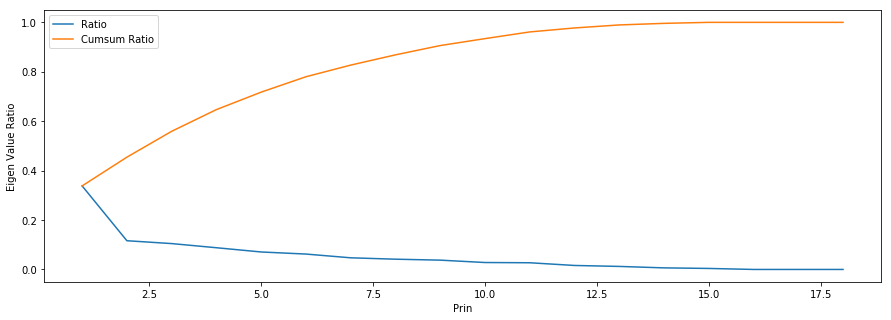

In [66]:
#고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"],ds_pca["EigenValueRatio"],label="Ratio")
#누락된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"],ds_pca["CumsumEigenValueRatio"],label="Cumsum Ratio")
#그래프 label, legend설정
plt.ylabel("Eigen Value Ratio")
plt.xlabel("Prin")
plt.legend(loc="Best")